<a href="https://colab.research.google.com/github/ASHUTOSH-kumar2178/Machine-Learning-Projects/blob/main/Food_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re

#Modules for Visualizations
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Tools for preprocessing the Dtaa
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import gensim

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install sklearn -upgrade


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [ ]:
data= pd.read_csv("/content/Restaurant_Reviews.tsv", delimiter="\t")

data= data[:200]

In [ ]:
data= data[:2000]

# New Section

In [ ]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
stopset= set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True , lowercase= True ,strip_accents='ascii' , stop_words= stopset)


X= vectorizer.fit_transform(data.Review)
#print(X)

Y= data.Liked

print(Y.shape)
print(X.shape)


(1000,)
(1000, 1907)


In [ ]:
print(Y)

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64


In [ ]:
from sklearn import naive_bayes
train_x,test_x, train_y,test_y = train_test_split(X,Y,test_size=0.30,random_state=0)

model_nvb = naive_bayes.MultinomialNB()

model_nvb.fit(train_x,train_y)

MultinomialNB()

In [ ]:
rev= np.array(["Food is Good"])
gh= vectorizer.transform(rev)
print(model_nvb.predict(gh))

[1]


In [ ]:
data.shape

(200, 2)

In [ ]:

def preprocess_data(text):
    
    
    #Remove email address with 'emailaddr'
    text= re.sub('\b[\w\-.]+?@\w{2,4}\b', " ",text)
    
    #Remove URLs with httpaddr
    text= re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)'," ",text)
    
    #Remove non-letters
    text = re.sub("[^a-zA-Z]"," ",text)
    
    #Remove numbers
    text= re.sub('\d+(\.\d+)?'," ",text)
    
    #converting all reviews to lower form
    text=text.lower().split()
    
    stop= set(stopwords.words("english"))
    
    #print(stop)
    
    meaningful= [ps.stem(w) for w in text if not w in stop]
    
    return (" ".join(meaningful))
    
    
    
    
    
    

In [ ]:
clean_review= []

#Intialize porter stremmer
ps=PorterStemmer()




In [ ]:
review_count = data['Review'].size

review_count

200

In [ ]:
for i in range(review_count):
  clean_review.append(preprocess_data(data['Review'][i]))

In [ ]:
data['Review'][0]

'Wow... Loved this place.'

In [ ]:
clean_review[0]

NameError: ignored

In [ ]:
cv= CountVectorizer()

data_input= cv.fit_transform(clean_review)
data_input= data_input.toarray()

In [ ]:
data_input[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
def show_wordcloud(data,title = None):
  wordcloud = WordCloud(
				background_color ='black',max_font_size=40,
				stopwords = stopwords,max_words=200,scale =3).generate(str(data))

  fig= plt.figure(1, figsize=(15,15))
  plt.axis("off")

  if title:
    fig.suptitle(title, fontsize=20)
    fig.subplot_adjust(top=2.3)

  plt.imshow(wordcloud)
  plt.show()  
  """plt.figure(figsize = (15, 15), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  plt.show()""" 

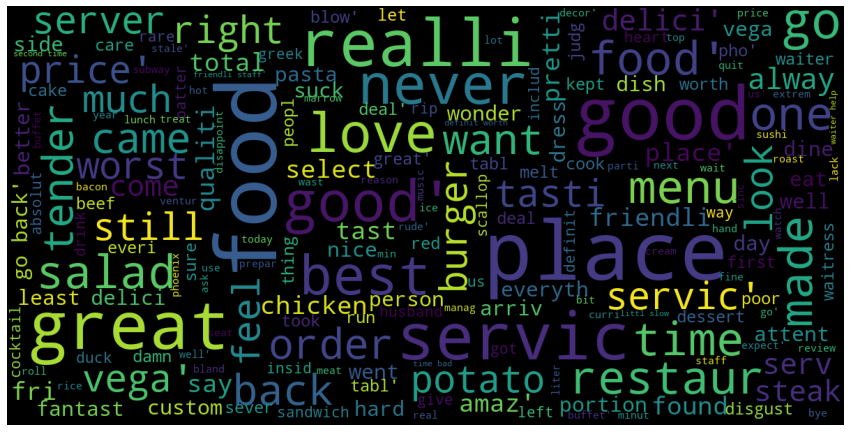

In [ ]:
show_wordcloud(clean_review)

In [ ]:
print(type(data['Liked']))

<class 'pandas.core.series.Series'>


Applying the Classificatiions


data_output= data['Liked']

In [ ]:
data_output= data['Liked']

In [ ]:
data_output

0      1
1      0
2      0
3      1
4      1
      ..
195    1
196    0
197    0
198    1
199    1
Name: Liked, Length: 200, dtype: int64

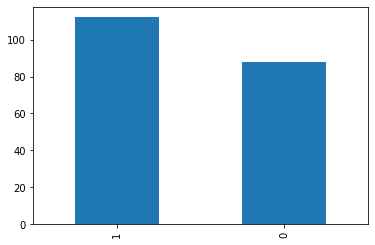

In [ ]:
data_output.value_counts().plot.bar()

Splitting data for Training and Testing 

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_x,test_x, train_y,test_y = train_test_split(data_input,data_output,test_size=0.20,random_state=0)

Preparing ML Model 
Training


In [ ]:
model_nvb = GaussianNB()
model_nvb.fit(train_x,train_y)

model_rf = RandomForestClassifier(n_estimators=1000,random_state=0)
model_rf.fit(train_x,train_y)

model_dt= tree.DecisionTreeClassifier()
model_dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [ ]:
prediction_nvb= model_nvb.predict(test_x)
prediction_rf= model_rf.predict(test_x)
prediction_dt= model_dt.predict(test_x)

In [ ]:
print("Acuuracy for Naive bayes: %0.5f \n\n" %accuracy_score(test_y,prediction_nvb))
print("Classification Report Naive Bayes: \n",classification_report(test_y,prediction_nvb))

Acuuracy for Naive bayes: 0.62500 


Classification Report Naive Bayes: 
               precision    recall  f1-score   support

           0       0.68      0.59      0.63        22
           1       0.57      0.67      0.62        18

    accuracy                           0.62        40
   macro avg       0.63      0.63      0.62        40
weighted avg       0.63      0.62      0.63        40



Random Forest

In [ ]:
print("Acuuracy for Random Forest: %0.5f \n\n" %accuracy_score(test_y,prediction_rf))
print("Classification Report Random Forest: \n",classification_report(test_y,prediction_rf))

Acuuracy for Random Forest: 0.70000 


Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.69      0.61      0.65        18

    accuracy                           0.70        40
   macro avg       0.70      0.69      0.69        40
weighted avg       0.70      0.70      0.70        40



Decison Tree

In [ ]:
print("Acuuracy for Decision Tree: %0.5f \n\n" %accuracy_score(test_y,prediction_dt))
print("Classification Report Decision Tree: \n",classification_report(test_y,prediction_dt))

Acuuracy for Decision Tree: 0.70000 


Classification Report Decision Tree: 
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.69      0.61      0.65        18

    accuracy                           0.70        40
   macro avg       0.70      0.69      0.69        40
weighted avg       0.70      0.70      0.70        40

